In [80]:
import os, shutil
import re
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import time
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers
from keras.layers import Dropout

In [2]:
data_bart_dir = 'data/bart/'
data_marge_dir = 'data/marge/'
data_homer_dir = 'data/homer/'
data_lisa_dir = 'data/lisa/'
data_ned_dir = 'data/ned/'
data_moe_dir = 'data/moe/'
data_krusty_dir = 'data/krusty/'
data_skinner_dir = 'data/skinner/'
data_charles_dir = 'data/charles/'
data_milhouse_dir = 'data/milhouse/'
data_other_dir = 'data/other/'
new_dir = 'split/'

In [3]:
x = [file.replace('.jpg','') for file in os.listdir('simpson_test_set/')]
list_names = set([re.sub('[0-9]+', '', file) for file in x])
list_names = list(list_names)


In [4]:
test_imgs_bart = [file for file in os.listdir('simpson_test_set/') if file.startswith('bart_simpson')]
test_imgs_homer = [file for file in os.listdir('simpson_test_set/') if file.startswith('homer_simpson')]
test_imgs_marge = [file for file in os.listdir('simpson_test_set/') if file.startswith('marge_simpson')]
test_imgs_lisa = [file for file in os.listdir('simpson_test_set/') if file.startswith('lisa_simpson')]
test_imgs_moe = [file for file in os.listdir('simpson_test_set/') if file.startswith('moe_szyslak')]
test_imgs_ned = [file for file in os.listdir('simpson_test_set/') if file.startswith('ned_flanders')]
test_imgs_krusty = [file for file in os.listdir('simpson_test_set/') if file.startswith('krusty_the_clown')]
test_imgs_skinner = [file for file in os.listdir('simpson_test_set/') if file.startswith('principal_skinner')]
test_imgs_charles = [file for file in os.listdir('simpson_test_set/') if file.startswith('charles_montgomery_burns')]
test_imgs_milhouse = [file for file in os.listdir('simpson_test_set/') if file.startswith('milhouse_van_houten')]

In [5]:
character_test =[test_imgs_bart, test_imgs_homer, test_imgs_marge, test_imgs_lisa ,test_imgs_moe,test_imgs_ned,test_imgs_krusty,test_imgs_skinner,test_imgs_charles,test_imgs_milhouse]
all_characters_test = []
for character in character_test:
    all_characters_test.extend(character)

In [6]:
test_imgs_other = [file for file in os.listdir('simpson_test_set/') if file not in all_characters_test]

In [7]:
# print(len(test_imgs_bart))
# print(len(test_imgs_homer))
# print(len(test_imgs_marge))
# print(len(test_imgs_lisa))
# print(len(test_imgs_moe))
# print(len(test_imgs_ned))
# print(len(test_imgs_krusty))
# print(len(test_imgs_skinner))
# print(len(test_imgs_charles))
# print(len(test_imgs_milhouse))
# print(len(test_imgs_other))


In [8]:
train_imgs_bart = [file for file in os.listdir('simpsons_training_set/bart_simpson/')]
train_imgs_homer = [file for file in os.listdir('simpsons_training_set/homer_simpson/')]
train_imgs_marge = [file for file in os.listdir('simpsons_training_set/marge_simpson/')]
train_imgs_lisa = [file for file in os.listdir('simpsons_training_set/lisa_simpson/')]
train_imgs_moe = [file for file in os.listdir('simpsons_training_set/moe_szyslak/')]
train_imgs_ned = [file for file in os.listdir('simpsons_training_set/ned_flanders/')]
train_imgs_krusty = [file for file in os.listdir('simpsons_training_set/krusty_the_clown/')]
train_imgs_skinner = [file for file in os.listdir('simpsons_training_set/principal_skinner/')]
train_imgs_charles = [file for file in os.listdir('simpsons_training_set/charles_montgomery_burns/')]
train_imgs_milhouse = [file for file in os.listdir('simpsons_training_set/milhouse_van_houten/')]


In [9]:
character_train = ['charles_montgomery_burns','milhouse_van_houten','moe_szyslak','ned_flanders','krusty_the_clown','marge_simpson','principal_skinner','bart_simpson','lisa_simpson', 'homer_simpson','.DS_Store']
train_images_other = []
for folder in os.listdir('simpsons_training_set/'):
    if folder not in character_train:
        for file in os.listdir('simpsons_training_set/'+folder):
            train_images_other.append(file)

In [10]:
print(len(train_imgs_bart))
print(len(train_imgs_homer))
print(len(train_imgs_marge))
print(len(train_imgs_lisa))
print(len(train_imgs_moe))
print(len(train_imgs_ned))
print(len(train_imgs_krusty))
print(len(train_imgs_skinner))
print(len(train_imgs_charles))
print(len(train_imgs_milhouse))
print(len(train_images_other))

1340
2246
1291
1354
1450
1454
1206
1194
1193
1079
7156


In [11]:
os.mkdir(new_dir)

FileExistsError: [Errno 17] File exists: 'split/'

In [13]:
train_folder = os.path.join(new_dir, 'train')
train_bart = os.path.join(train_folder, 'bart')
train_homer = os.path.join(train_folder, 'homer')
train_marge = os.path.join(train_folder, 'marge')
train_lisa = os.path.join(train_folder, 'lisa')
train_moe = os.path.join(train_folder, 'moe')
train_ned = os.path.join(train_folder, 'ned')
train_krusty = os.path.join(train_folder, 'krusty')
train_skinner = os.path.join(train_folder, 'skinner')
train_charles = os.path.join(train_folder, 'charles')
train_milhouse = os.path.join(train_folder, 'milhouse')
train_other = os.path.join(train_folder, 'other')

test_folder = os.path.join(new_dir, 'test')
test_bart = os.path.join(test_folder, 'bart')
test_homer = os.path.join(test_folder, 'homer')
test_marge = os.path.join(test_folder, 'marge')
test_lisa = os.path.join(test_folder, 'lisa')
test_moe = os.path.join(test_folder, 'moe')
test_ned = os.path.join(test_folder, 'ned')
test_krusty = os.path.join(test_folder, 'krusty')
test_skinner = os.path.join(test_folder, 'skinner')
test_charles = os.path.join(test_folder, 'charles')
test_milhouse = os.path.join(test_folder, 'milhouse')
test_other = os.path.join(test_folder, 'other')

val_folder = os.path.join(new_dir, 'val')
val_bart = os.path.join(val_folder, 'bart')
val_homer = os.path.join(val_folder, 'homer')
val_marge = os.path.join(val_folder, 'marge')
val_lisa = os.path.join(val_folder, 'lisa')
val_moe = os.path.join(val_folder, 'moe')
val_ned = os.path.join(val_folder, 'ned')
val_krusty = os.path.join(val_folder, 'krusty')
val_skinner = os.path.join(val_folder, 'skinner')
val_charles = os.path.join(val_folder, 'charles')
val_milhouse = os.path.join(val_folder, 'milhouse')
val_other = os.path.join(val_folder, 'other')



In [ ]:
# os.mkdir(train_folder)
# os.mkdir(train_bart)
# os.mkdir(train_homer)
# os.mkdir(train_lisa)
# os.mkdir(train_moe)
# os.mkdir(train_ned)
# os.mkdir(train_krusty)
# os.mkdir(train_skinner)
# os.mkdir(train_charles)
# os.mkdir(train_milhouse)
# os.mkdir(train_other)

# os.mkdir(test_folder)
# os.mkdir(test_bart)
# os.mkdir(test_homer)
# os.mkdir(test_lisa)
# os.mkdir(test_moe)
# os.mkdir(test_ned)
# os.mkdir(test_krusty)
# os.mkdir(test_skinner)
# os.mkdir(test_charles)
# os.mkdir(test_milhouse)
# os.mkdir(test_other)

# os.mkdir(val_folder)
# os.mkdir(val_bart)
# os.mkdir(val_homer)
# os.mkdir(val_lisa)
# os.mkdir(val_moe)
# os.mkdir(val_ned)
# os.mkdir(val_krusty)
# os.mkdir(val_skinner)
# os.mkdir(val_charles)
# os.mkdir(val_milhouse)
# os.mkdir(val_other)

os.mkdir(train_marge)
os.mkdir(test_marge)
os.mkdir(val_marge)


In [ ]:
# print(len(test_imgs_bart))
# print(len(test_imgs_homer))
# print(len(test_imgs_marge))
# print(len(test_imgs_lisa))
# print(len(test_imgs_moe))
# print(len(test_imgs_ned))
# print(len(test_imgs_krusty))
# print(len(test_imgs_skinner))
# print(len(test_imgs_charles))
# print(len(test_imgs_milhouse))
# print(len(test_imgs_other))

In [62]:
imgs = train_imgs_bart[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/bart_simpson/', img)
    destination = os.path.join(train_bart, img)
    shutil.copyfile(origin, destination)

In [25]:
imgs = train_imgs_homer[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/homer_simpson/', img)
    destination = os.path.join(train_homer, img)
    shutil.copyfile(origin, destination)

In [30]:
imgs = train_imgs_marge[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/marge_simpson/', img)
    destination = os.path.join(train_marge, img)
    shutil.copyfile(origin, destination)

In [31]:
imgs = train_imgs_lisa[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/lisa_simpson/', img)
    destination = os.path.join(train_lisa, img)
    shutil.copyfile(origin, destination)

In [32]:
imgs = train_imgs_moe[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/moe_szyslak/', img)
    destination = os.path.join(train_moe, img)
    shutil.copyfile(origin, destination)

In [33]:
imgs = train_imgs_ned[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/ned_flanders/', img)
    destination = os.path.join(train_ned, img)
    shutil.copyfile(origin, destination)

In [34]:
imgs = train_imgs_krusty[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/krusty_the_clown/', img)
    destination = os.path.join(train_krusty, img)
    shutil.copyfile(origin, destination)

In [35]:
imgs = train_imgs_skinner[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/principal_skinner/', img)
    destination = os.path.join(train_skinner, img)
    shutil.copyfile(origin, destination)

In [36]:
imgs = train_imgs_charles[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/charles_montgomery_burns/', img)
    destination = os.path.join(train_charles, img)
    shutil.copyfile(origin, destination)

In [37]:
imgs = train_imgs_milhouse[150:]
for img in imgs:
    origin = os.path.join('simpsons_training_set/milhouse_van_houten/', img)
    destination = os.path.join(train_milhouse, img)
    shutil.copyfile(origin, destination)

In [68]:
imgs = train_imgs_bart[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/bart_simpson/', img)
    destination = os.path.join(val_bart, img)
    shutil.copyfile(origin, destination)
    
imgs = train_imgs_homer[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/homer_simpson/', img)
    destination = os.path.join(val_homer, img)
    shutil.copyfile(origin, destination)
    
imgs = train_imgs_marge[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/marge_simpson/', img)
    destination = os.path.join(val_marge, img)
    shutil.copyfile(origin, destination)
    
imgs = train_imgs_lisa[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/lisa_simpson/', img)
    destination = os.path.join(val_lisa, img)
    shutil.copyfile(origin, destination)

imgs = train_imgs_moe[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/moe_szyslak/', img)
    destination = os.path.join(val_moe, img)
    shutil.copyfile(origin, destination)
    
imgs = train_imgs_ned[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/ned_flanders/', img)
    destination = os.path.join(val_ned, img)
    shutil.copyfile(origin, destination)
    
imgs = train_imgs_krusty[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/krusty_the_clown/', img)
    destination = os.path.join(val_krusty, img)
    shutil.copyfile(origin, destination)

imgs = train_imgs_skinner[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/principal_skinner/', img)
    destination = os.path.join(val_skinner, img)
    shutil.copyfile(origin, destination)

imgs = train_imgs_charles[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/charles_montgomery_burns/', img)
    destination = os.path.join(val_charles, img)
    shutil.copyfile(origin, destination)
    250
imgs = train_imgs_milhouse[:250]
for img in imgs:
    origin = os.path.join('simpsons_training_set/milhouse_van_houten/', img)
    destination = os.path.join(val_milhouse, img)
    shutil.copyfile(origin, destination)


In [39]:
imgs = test_imgs_bart
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_bart, img)
    shutil.copyfile(origin, destination)
    
imgs = test_imgs_homer
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_homer, img)
    shutil.copyfile(origin, destination)
    
imgs = test_imgs_marge
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_marge, img)
    shutil.copyfile(origin, destination)
    
imgs = test_imgs_lisa
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_lisa, img)
    shutil.copyfile(origin, destination)

imgs = test_imgs_moe
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_moe, img)
    shutil.copyfile(origin, destination)
    
imgs = test_imgs_ned
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_ned, img)
    shutil.copyfile(origin, destination)
    
imgs = test_imgs_krusty
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_krusty, img)
    shutil.copyfile(origin, destination)

imgs = test_imgs_skinner
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_skinner, img)
    shutil.copyfile(origin, destination)

imgs = test_imgs_charles
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_charles, img)
    shutil.copyfile(origin, destination)
    
imgs = test_imgs_milhouse
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_milhouse, img)
    shutil.copyfile(origin, destination)
    
imgs = test_imgs_other
for img in imgs:
    origin = os.path.join('simpson_test_set/', img)
    destination = os.path.join(test_other, img)
    shutil.copyfile(origin, destination)

In [43]:
imgs = train_images_other[150:]
character_train = ['charles_montgomery_burns','milhouse_van_houten','moe_szyslak','ned_flanders','krusty_the_clown','marge_simpson','principal_skinner','bart_simpson','lisa_simpson', 'homer_simpson','.DS_Store']
for folder in os.listdir('simpsons_training_set/'):
    if folder not in character_train:
        for img in imgs:
            if img in os.listdir('simpsons_training_set/'+folder):
                origin = os.path.join('simpsons_training_set/'+folder,img)
                destination = os.path.join(train_other,img)
                shutil.copyfile(origin, destination)


In [69]:
imgs = train_images_other[:250]
character_train = ['charles_montgomery_burns','milhouse_van_houten','moe_szyslak','ned_flanders','krusty_the_clown','marge_simpson','principal_skinner','bart_simpson','lisa_simpson', 'homer_simpson','.DS_Store']
for folder in os.listdir('simpsons_training_set/'):
    if folder not in character_train:
        for img in imgs:
            if img in os.listdir('simpsons_training_set/'+folder):
                origin = os.path.join('simpsons_training_set/'+folder,img)
                destination = os.path.join(val_other,img)
                shutil.copyfile(origin, destination)

In [85]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 32) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 32)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=32)

Found 990 images belonging to 11 classes.
Found 2622 images belonging to 11 classes.
Found 13286 images belonging to 11 classes.


# Model 1 

In [88]:
np.random.seed(123)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(Dropout(.25))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(Dropout(.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(Dropout(.25))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(11, activation='sigmoid'))


model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['acc'])

filepath = "model_0.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

cnn_history = model.fit_generator(train_generator,
                    epochs=15,
                    validation_data=val_generator, callbacks=callbacks_list)


Epoch 1/15
416/416 [==============================] - 188s 451ms/step - loss: 1.7010 - acc: 0.4581 - val_loss: 1.3889 - val_acc: 0.5549

Epoch 00001: loss improved from inf to 1.70127, saving model to model_0.h5
Epoch 2/15
416/416 [==============================] - 8428s 20s/step - loss: 1.1149 - acc: 0.6397 - val_loss: 1.0386 - val_acc: 0.6545

Epoch 00002: loss improved from 1.70127 to 1.11481, saving model to model_0.h5
Epoch 3/15
416/416 [==============================] - 240s 576ms/step - loss: 0.8482 - acc: 0.7237 - val_loss: 0.7689 - val_acc: 0.7544

Epoch 00003: loss improved from 1.11481 to 0.84771, saving model to model_0.h5
Epoch 4/15
416/416 [==============================] - 243s 583ms/step - loss: 0.6890 - acc: 0.7725 - val_loss: 0.6565 - val_acc: 0.7982

Epoch 00004: loss improved from 0.84771 to 0.68838, saving model to model_0.h5
Epoch 5/15
416/416 [==============================] - 224s 539ms/step - loss: 0.5530 - acc: 0.8145 - val_loss: 0.6963 - val_acc: 0.7845

Epoc

git add . 
git commit -m 'note'
git push 

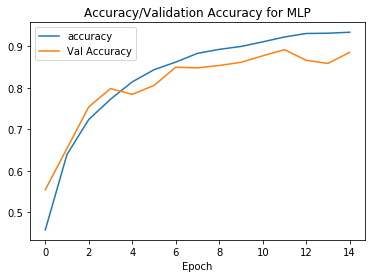

In [89]:

history = cnn_history.history
plt.figure()
plt.plot(history['acc'])
plt.plot(history['val_acc'])
plt.title('Accuracy/Validation Accuracy for MLP')
plt.xlabel('Epoch')
plt.legend(['accuracy', 'Val Accuracy'])
plt.show()